### Use Case Dasar Python

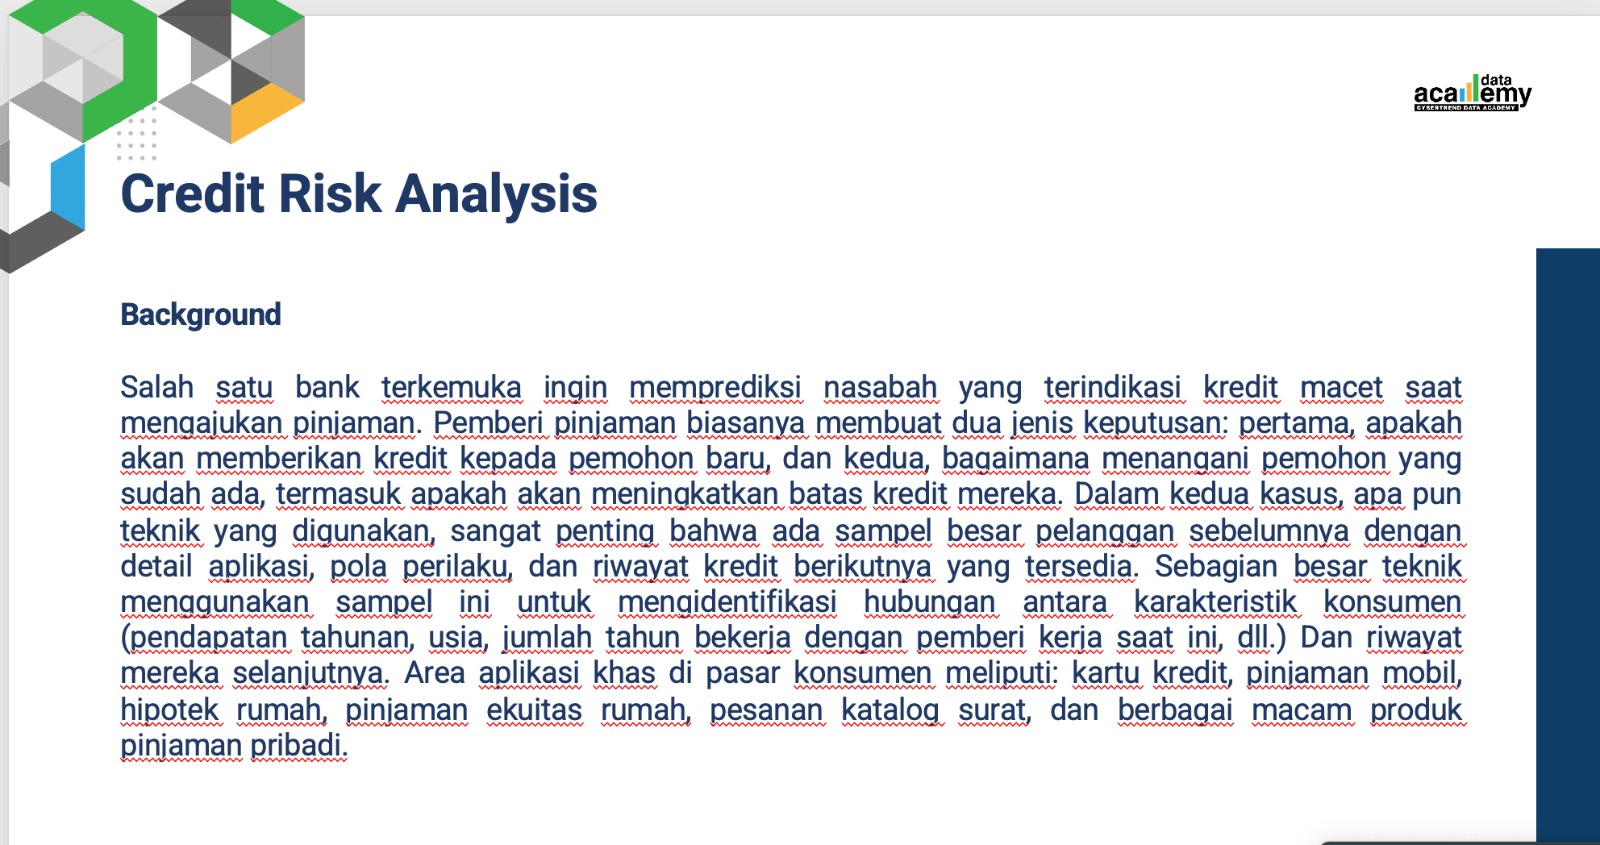

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [80]:
path='/content/drive/MyDrive/DataSource/credit_risk_1.csv'
load_data=pd.read_csv(path)
print(load_data)

     Unnamed: 0  age  ed  employ  address  income  debtinc   creddebt  \
0             0   41   3      17       12     176      9.3  11.359392   
1             1   27   1      10        6      31     17.3   1.362202   
2             2   40   1      15       14      55      5.5   0.856075   
3             3   41   1      15       14     120      2.9   2.658720   
4             4   24   2       2        0      28     17.3   1.787436   
..          ...  ...  ..     ...      ...     ...      ...        ...   
695         695   36   2       6       15      27      4.6   0.262062   
696         696   29   2       6        4      21     11.5   0.369495   
697         697   33   1      15        3      32      7.6   0.491264   
698         698   45   1      19       22      77      8.4   2.302608   
699         699   37   1      12       14      44     14.7   2.994684   

      othdebt  default  
0    5.008608      1.0  
1    4.000798      0.0  
2    2.168925      0.0  
3    0.821280      0.0 

In [81]:
df=pd.DataFrame(load_data)
df

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...,...
695,695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


## Business Understanding

Salah satu bank terkemuka ingin memprediksi nasabah yg terindikasi kredit macet saat mengajukan pinjaman.

Pemberi pinjaman biasanya membuat dua jenis keputusan :
- Pertama, apakah akan memberikan kredit kepada pemohon baru
- Kedua, bagaimana menangani pemohon yang sudah ada, termasuk apakah akan meningkatkan batas kredit mereka.

Dalam kedua kasus, apa pun teknik yang digunakan, sangat penting bahwa ada sampel besar pelanggan sebelumnya dengan detail aplikasi, pola perilaku, dan riwayat kredit berikutnya yang tersedia. Sebagian besar teknik menggunakan sampel ini untuk mengidentifikasi hubungan antara karakteristik konsumen (pendapatan tahunan, usia, jumlah tahun bekerja dengan pemberi kerja saat ini, dll.) Dan riwayat mereka selanjutnya.

Area aplikasi khas di pasar konsumen meliputi: kartu kredit, pinjaman mobil, hipotek rumah, pinjaman ekuitas rumah, pesanan katalog surat, dan berbagai macam produk pinjaman pribadi.

## Analisa Data
Permasalahan yang diangkat adalah **prediksi kredit macet.**

**Goal :**

1. Prediksi potensi nasabah "Gagal Bayar"

**Problem**: klasifikasi

  *  **Kemungkinan algoritma**:
* Decission tree
* Random forest
* SVM
* XGboost tree classification

2. Prediksi nilai kredit yang akan diberikan kepada nasabah lama (old nasabah)

## Data Collection/Description

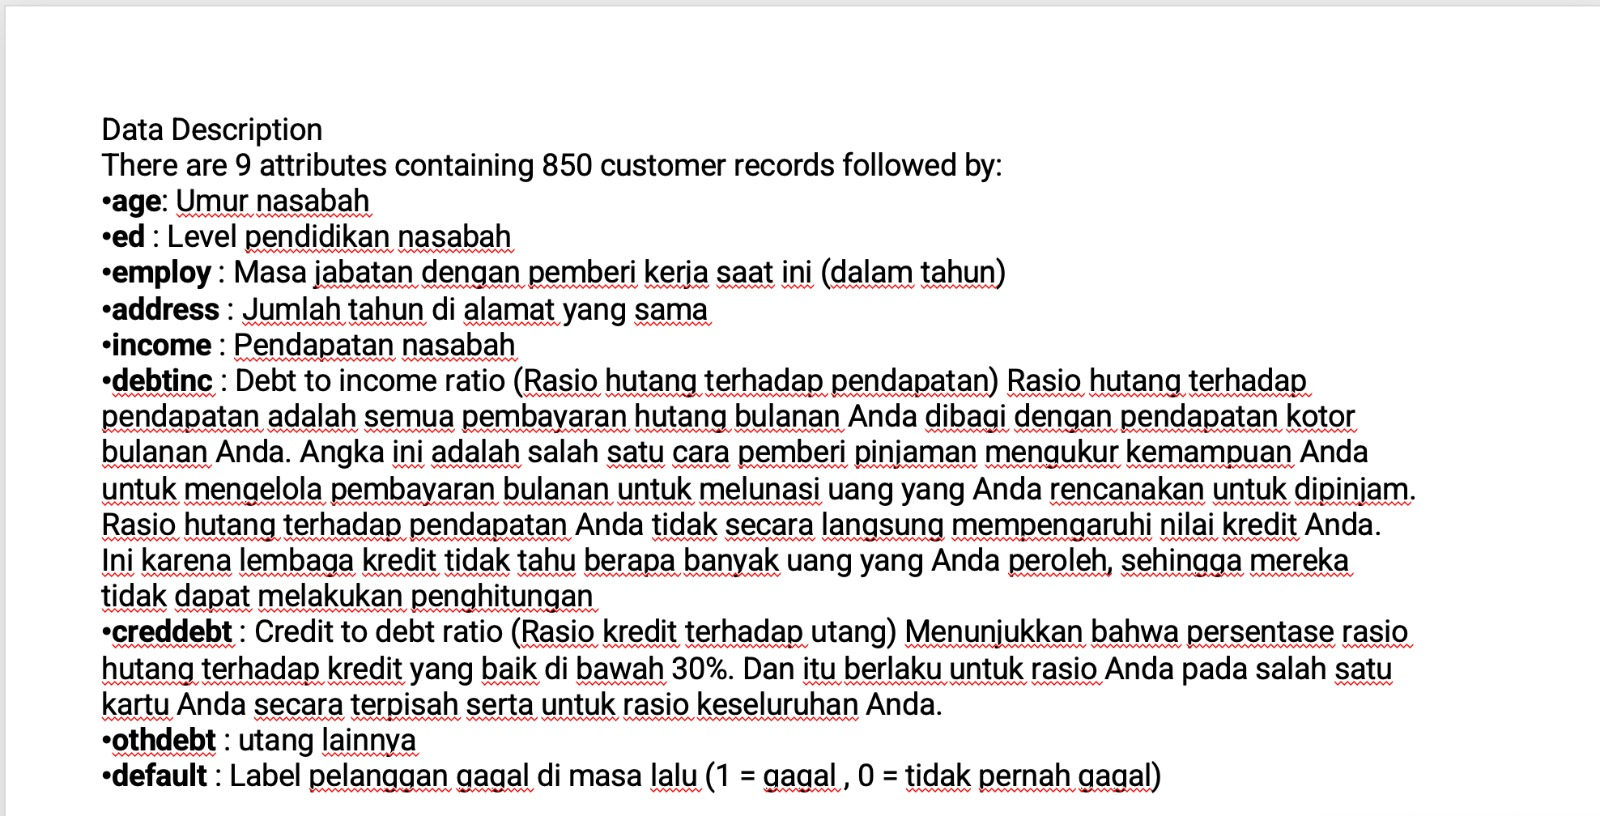

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


In [83]:
df=df.drop('Unnamed: 0', axis=1)
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [84]:
df['total_creddebt']=(df['creddebt']+df['othdebt'])
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,total_creddebt
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0,16.368
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0,5.363
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0,3.025
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0,3.480
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0,4.844


In [85]:
# DTI = total hutang/pendapatan bulanan
# Rasio kredit terhadap utang = total kredit yg tersedia/total hutang
hutang=176*9.3/100
kredit=(29-16.368)*hutang
print('Total nilai kredit: ',kredit)

Total nilai kredit:  206.76057600000004


In [86]:
df['total_nilai_kredit']=(29 -df['creddebt']*df['creddebt'])
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,total_creddebt,total_nilai_kredit
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0,16.368,-100.035787
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0,5.363,27.144406
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0,3.025,28.267136
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0,3.480,21.931208
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0,4.844,25.805073
...,...,...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0,1.242,28.931324
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0,2.415,28.863473
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0,2.432,28.758660
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0,6.468,23.697996


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 700 non-null    int64  
 1   ed                  700 non-null    int64  
 2   employ              700 non-null    int64  
 3   address             700 non-null    int64  
 4   income              700 non-null    int64  
 5   debtinc             700 non-null    float64
 6   creddebt            700 non-null    float64
 7   othdebt             700 non-null    float64
 8   default             700 non-null    float64
 9   total_creddebt      700 non-null    float64
 10  total_nilai_kredit  700 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 60.3 KB


In [88]:
df['ed'].value_counts()

1    372
2    198
3     87
4     38
5      5
Name: ed, dtype: int64

In [89]:
df['age'].value_counts()

29    44
28    37
39    37
31    36
41    34
34    33
36    29
27    28
40    27
35    27
32    25
33    25
30    24
24    24
38    23
26    23
37    22
25    20
23    18
43    17
42    16
47    16
45    16
48    15
46    13
22    12
21    10
44     9
50     8
52     7
53     6
51     6
54     4
49     4
55     2
20     2
56     1
Name: age, dtype: int64

## Visualisasi Data

<Axes: xlabel='variable', ylabel='value'>

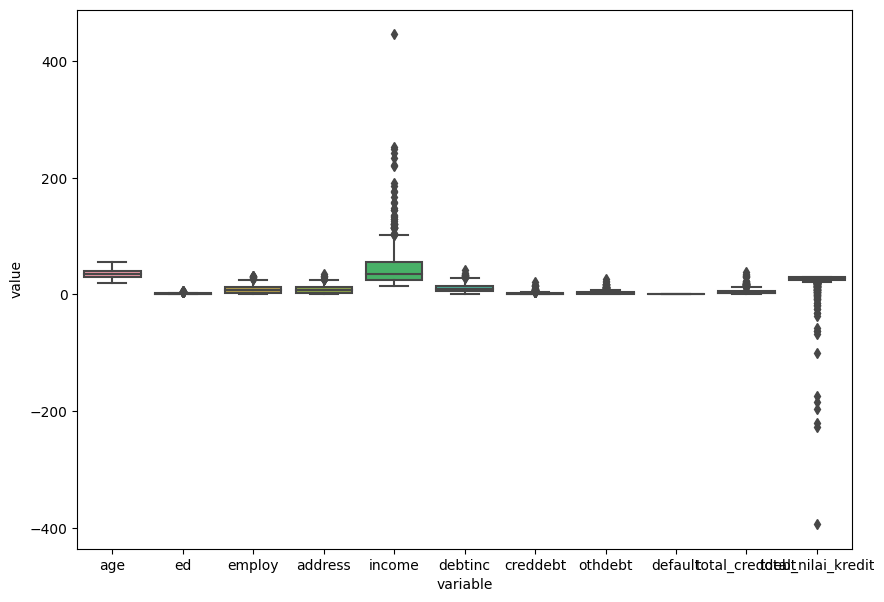

In [90]:
plt.figure(figsize=(10, 7))
sns.boxplot(
    x='variable',
    y='value',
    data=pd.melt(df)
    )

<Axes: xlabel='variable', ylabel='value'>

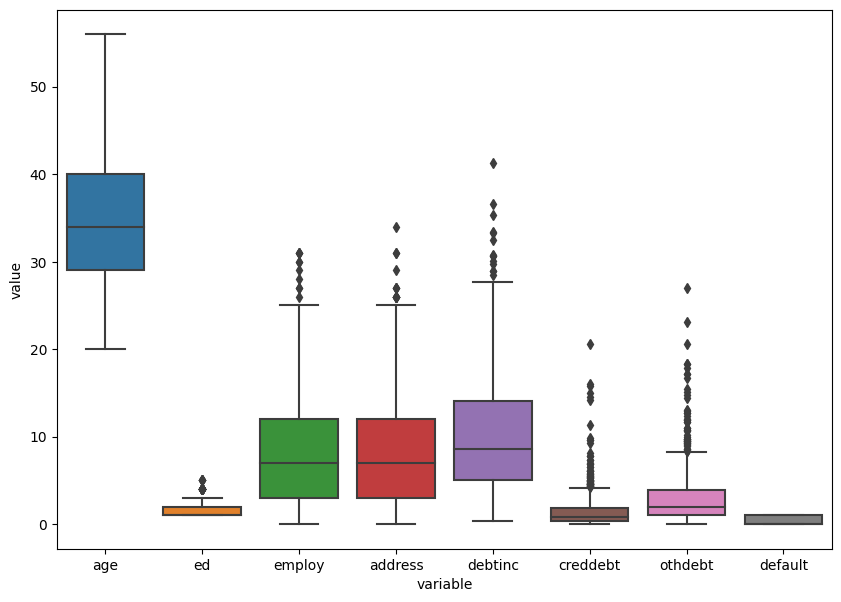

In [91]:
dfx=df[
    ['age',
    'ed',
    'employ',
    'address',
    'debtinc',
    'creddebt',
    'othdebt',
    'default']
]
plt.figure(figsize=(10, 7))
sns.boxplot(
    x='variable',
    y='value',
    data=pd.melt(dfx)
    )

<Axes: xlabel='variable', ylabel='value'>

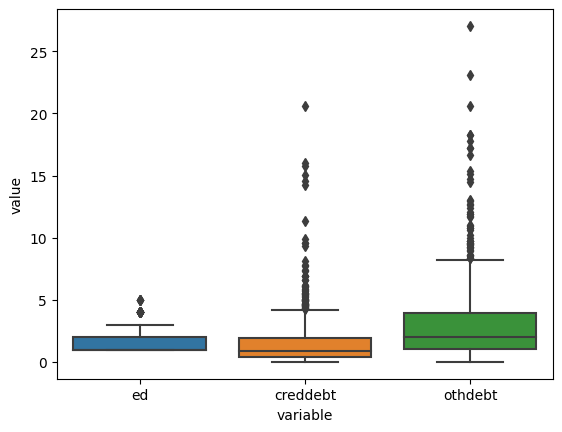

In [92]:
dfx1=df[
    ['ed',
     'creddebt',
     'othdebt']
    ]

sns.boxplot(
    x='variable',
    y='value',
    data=pd.melt(dfx1)
    )

<Axes: xlabel='variable', ylabel='value'>

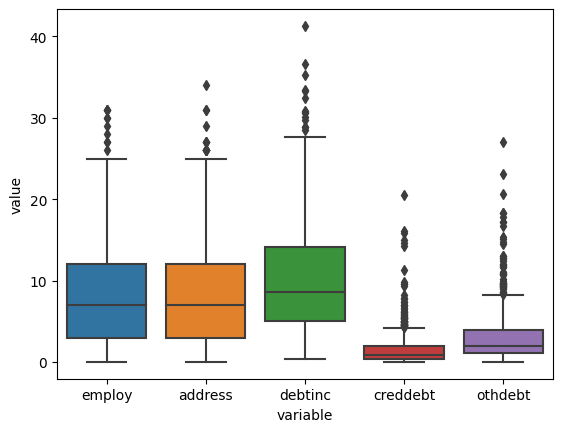

In [93]:
dfx2=df[
    ['employ',
    'address',
    'debtinc',
    'creddebt',
    'othdebt']
]

sns.boxplot(
    x='variable',
    y='value',
    data=pd.melt(dfx2)
    )

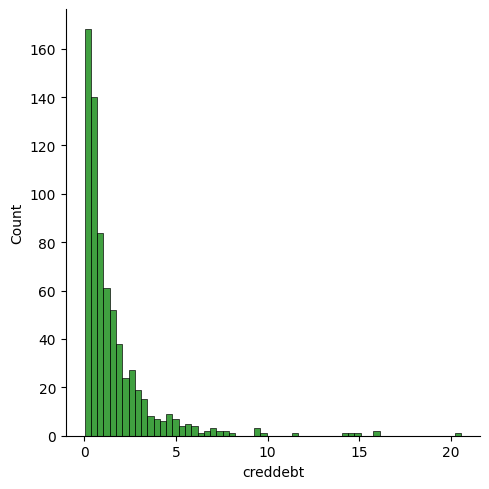

In [94]:
sns.displot(
    x='creddebt',
    data=dfx2,
    color='g'
)

<Axes: xlabel='debtinc'>

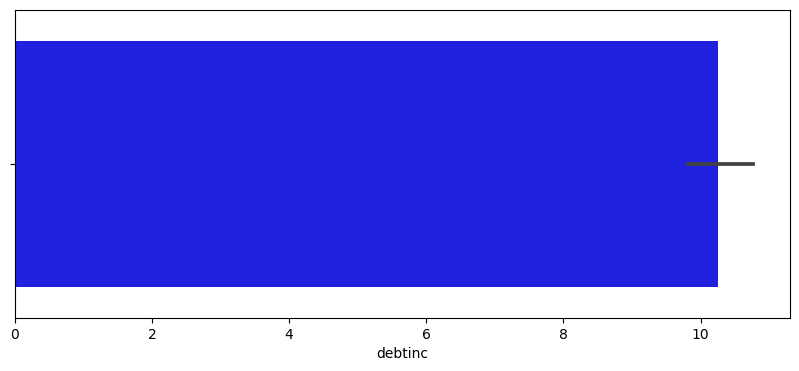

In [95]:
plt.figure(figsize=(10,4))
sns.barplot(
    x='debtinc',
    color='b',
    data=dfx2
)

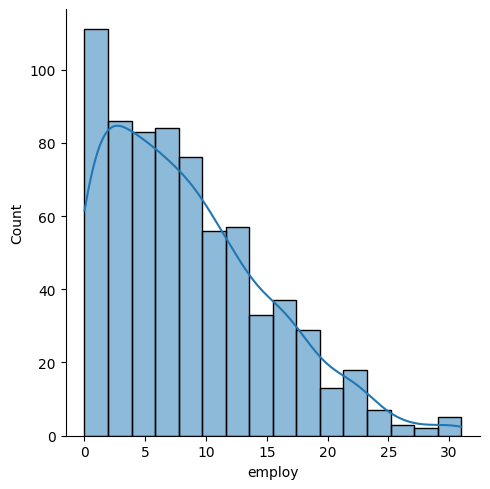

In [96]:
sns.displot(
    x='employ',
    data=df,
    kde=True
    )

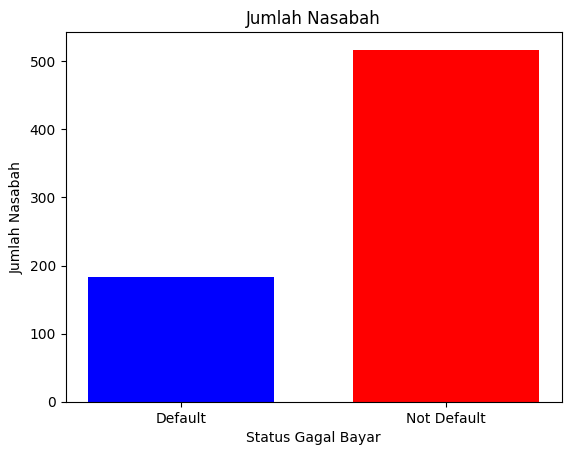

In [97]:
# Pisahkan data berdasarkan status gagal bayar
df_default = df[df['default'] == 1]
df_not_default = df[df['default'] == 0]

plt.bar(
    x=['Default', 'Not Default'],
    height=[len(df_default), len(df_not_default)],
    color=['b', 'r'],
    width=0.7,
)

plt.title('Jumlah Nasabah')
plt.xlabel('Status Gagal Bayar')
plt.ylabel('Jumlah Nasabah')
plt.show()

In [98]:
# Hitung jumlah nasabah yang gagal bayar dan tidak gagal bayar
jumlah_default = df['default'].value_counts()[1]
jumlah_not_default = df['default'].value_counts()[0]

# Tampilkan hasil
print('Jumlah nasabah yang gagal bayar:', jumlah_default)
print('Jumlah nasabah yang tidak gagal bayar:', jumlah_not_default)

Jumlah nasabah yang gagal bayar: 183
Jumlah nasabah yang tidak gagal bayar: 517


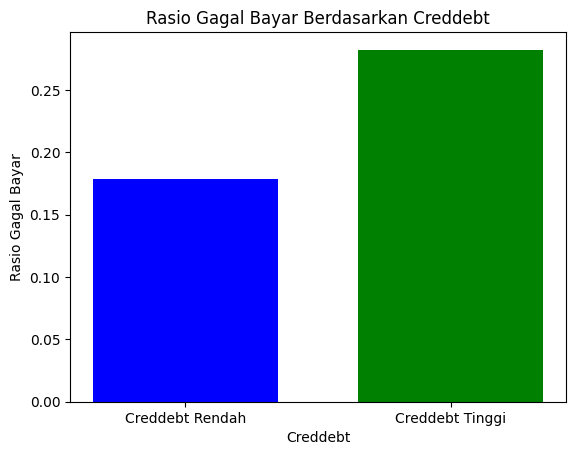

In [99]:
# Pisahkan data berdasarkan rasio creddebt
df_creddebt_rendah = df[df['creddebt'] <= 0.3]
df_creddebt_tinggi = df[df['creddebt'] > 0.3]

# Hitung rasio gagal bayar untuk masing-masing kelompok data
rasio_gagal_bayar_rendah = len(df_creddebt_rendah[df_creddebt_rendah['default'] == 1]) / len(df_creddebt_rendah)
rasio_gagal_bayar_tinggi = len(df_creddebt_tinggi[df_creddebt_tinggi['default'] == 1]) / len(df_creddebt_tinggi)

plt.bar(
    x=['Creddebt Rendah', 'Creddebt Tinggi'],
    height=[rasio_gagal_bayar_rendah, rasio_gagal_bayar_tinggi],
    color=['b', 'g'],
    width=0.7,
)

plt.title('Rasio Gagal Bayar Berdasarkan Creddebt')
plt.xlabel('Creddebt')
plt.ylabel('Rasio Gagal Bayar')
plt.show()

<Axes: xlabel='creddebt', ylabel='ed'>

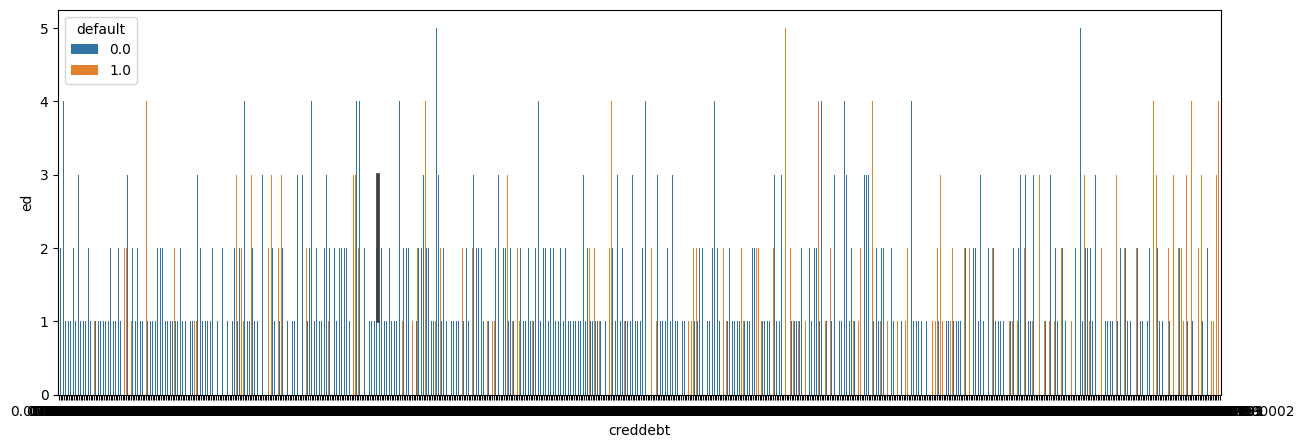

In [100]:
plt.figure(figsize=(15,5))
sns.barplot(
    x='creddebt',
    y='ed',
    hue='default',
    data=df)

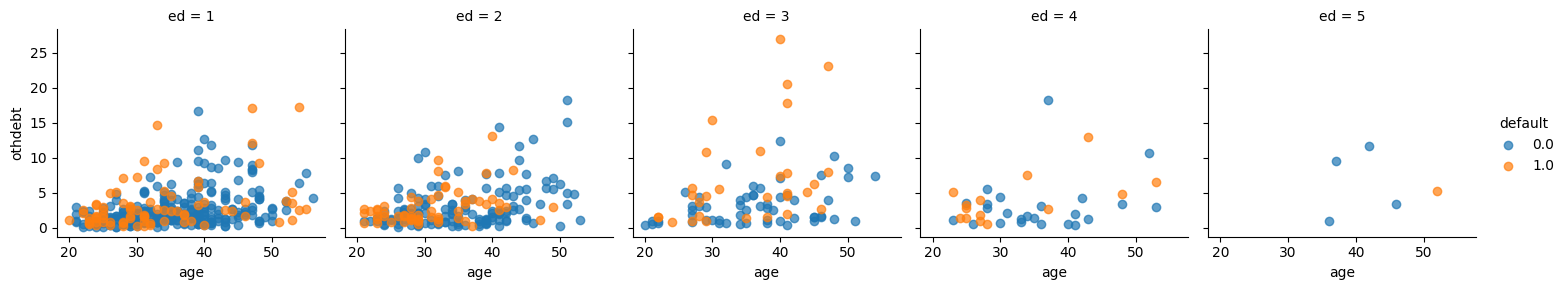

In [101]:
scatplot=sns.FacetGrid(
    df,
    col='ed',
    hue='default')
scatplot.map(
    plt.scatter,
    'age',
    'othdebt',
    alpha=0.7)
scatplot.add_legend()

### Interpretasi Grafik

- **Tingkat pendidikan 1**:
Pada range usia 20-30 di level ED 1, banyak terjadi gagal bayar

- **Tingkat pendidikan 2**:
Pada range usia 20-40 di level ED 2, banyak terjadi gagal bayar

- **Tingkat pendidikan 3**:
Pada range usia 30-45 di level ED 3, banyak terjadi gagal bayar

- **Tingkat pendidikan 4**:
Pada range usia 25-30 di level ED 4, banyak terjadi gagal bayar

- **Tingkat pendidikan 5**:
Pada range usia >50 di level ED 5, banyak terjadi gagal bayar

In [102]:
# import plotly.express as px
# fig=px.scatter(
#     df,

# )

# DAY 2


## 1. Prediksi potensi nasabah "Gagal Bayar"

## Data Preparation
1. Tidak ada temuan Missing value
2. Hanya digunakan 1 table

## Data Modelling

In [103]:
#Split Training and Testing
from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [104]:
# Input variabel
x=df[[
    'age',
    'ed',
    'employ',
    'address',
    'income',
    'debtinc',
    'creddebt',
    'othdebt'
]]

# Target variabel
y=df['default'].astype('category')

- Untuk pemodelan, maka kita harus membagi data training dan testing.
- Supaya kita bisa mengukur akurasi/error predict.
- Karena ini termasuk Supervised Learning maka harus ada pembagian training dan testing.

In [105]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,total_creddebt,total_nilai_kredit
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0,16.368,-100.035787
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0,5.363,27.144406
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0,3.025,28.267136
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0,3.480,21.931208
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0,4.844,25.805073
...,...,...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0,1.242,28.931324
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0,2.415,28.863473
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0,2.432,28.758660
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0,6.468,23.697996


In [106]:
x_train, x_test, y_train, y_test = train_test_split (
    x,
    y,
    test_size=0.3,
    random_state=0
)

In [107]:
#Evaluation Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

### Decision Tree Model

In [108]:
#Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [109]:
# Object Decision Tree Classifier
clf=DecisionTreeClassifier()

# Train model
model_clf=clf.fit(x_train,y_train)

# Predict model
y_pred_clf=model_clf.predict(x_test)

# Evaluasi klasifikasi
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76       155
         1.0       0.38      0.47      0.42        55

    accuracy                           0.66       210
   macro avg       0.59      0.60      0.59       210
weighted avg       0.69      0.66      0.67       210



Termasuk overfitting karena hanya 41% bisa menebak kasus gagal bayar. Tetapi underfitting karena memiliki akurasi 68% dan memiliki selisih dengan precision 0.81-0.68 = 0.1 (>precision)

- Gagal bayar 0.0 = 81 % (overfit) --> accurasi 68% : tidak akurat
- Gagal bayar 1.0 = 41 % (underfit) --> accuracy>precision

Dikatakan akurat jika selisih 0.01/0.02

Text(113.9222222222222, 0.5, 'Predict Label')

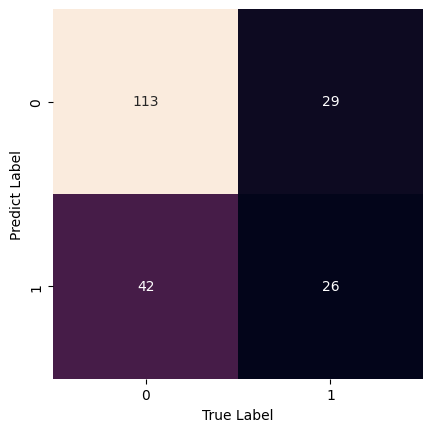

In [110]:
# Visualisasi confusion matrix
mat=confusion_matrix(y_test,y_pred_clf)
sns.heatmap(
    mat.T,
    square=True,
    annot=True,
    fmt='d',
    cbar=False
)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

#### Evaluasi
1. Model dalam mempredict orang yg **tidak gagal bayar** akurasi sebesar 81%, sedangkan accuracy 68% jadi bisa disimpulkan bahwa model UNDERFIT dalam mempredict orang yg TIDAK GAGAL BAYAR
2. Model OVERFIT dalam mempredict orang yg **gagal bayar**. Hal ini ditunjukkan nilai precision 41% dan nilai accuracy overall 68%. Artinya precision<accuracy (High accuracy and low precision)
3. Berdasarkan confusion matrix, maka model pintar dalam mempredict orang yg tidak gagal bayar
4. Model menggunakan Decision Tree tidak bisa diimplementasikan pada case ini

# DAY 3

<Axes: >

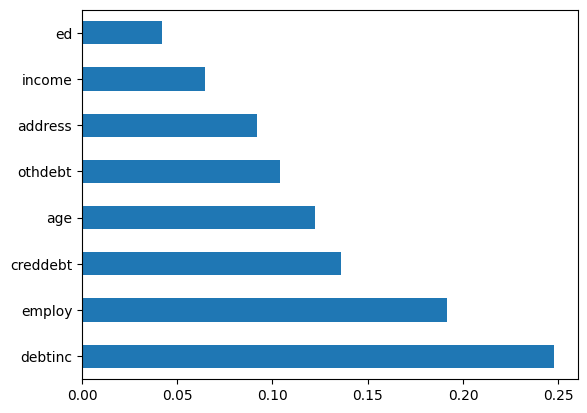

In [111]:
# Signifikan factor dari awal --> Decision Tree
feat_importances=pd.Series(
    model_clf.feature_importances_,
    index=x.columns
)
feat_importances.nlargest(10).plot(kind='barh')

### Random Forest Model

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [113]:
# Object Random Forest Classifier
rf=RandomForestClassifier(
    n_estimators=200,
    max_depth=6
)

# Train model
model_rf=rf.fit(x_train,y_train)

# Predict model
y_pred_rf=model_rf.predict(x_test)

# Evaluasi klasifikasi
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87       155
         1.0       0.71      0.36      0.48        55

    accuracy                           0.80       210
   macro avg       0.76      0.66      0.68       210
weighted avg       0.78      0.80      0.77       210



Hasil Evaluasi Pemodelan Random Forest
1.  Model Underfit dalam mempredict orang yang Tidak Gagal Bayar akurasi sebesar 80%, sedangkan overall accuracy 76% jadi bisa disimpulkan bahwa model Underfit dalam mempredik orang yg TIDAK GAGAL BAYAR.

2. Model overfit dalam mempredict Orang yang GAGAGL BAYAR. Hal ini ditunjukan nilai precisi 56% dan nilai accurasi overall 76%. Artinya precisi lebih rendah daripada accurasi (High accuracy and low precisi)

3. Berdasarkan confustion matrix, maka model pintar dalam mem predict orang yang tidak gagal bayar.
Model menggunakan Random forest  tidak bisa diimplementasi pada case ini.

Hasil evaluasi setelah tunning model dengan menambahkan Hyperparameter
1. Model dinilai tepat dalam memprediksi nili 0 (orang yg TIDAK GAGAL BAYAR)
2. Model masih Overfit dalam mempredict nilai 1 (orang yg GAGAL BAYAR)
3. Model Random Forest belum bisa diterapka pada case ini

Text(113.9222222222222, 0.5, 'Predict Label')

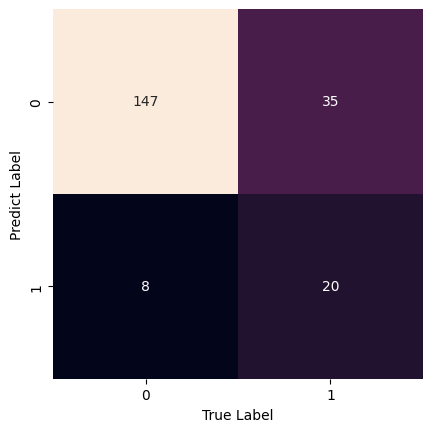

In [114]:
# Visualisasi confusion matrix Random Forest
mat=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(
    mat.T,
    square=True,
    annot=True,
    fmt='d',
    cbar=False
)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

<Axes: >

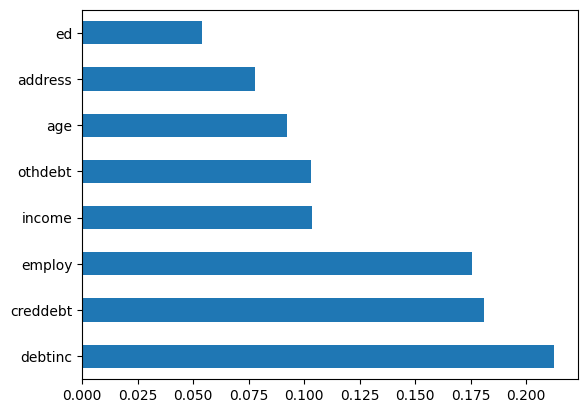

In [115]:
# Signifikan factor dari awal --> Random forest
feat_importances=pd.Series(
    model_rf.feature_importances_,
    index=x.columns
)
feat_importances.nlargest(10).plot(kind='barh')

### Support Vector Machine Model

In [116]:
from sklearn.svm import SVC

In [117]:
# Object SVM
svm=SVC(
    kernel='linear',
    random_state=0
)

# Train model
model_svm=svm.fit(x_train,y_train)

# Predict model
y_pred_svm=model_svm.predict(x_test)

# Evaluasi SVM
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88       155
         1.0       0.73      0.44      0.55        55

    accuracy                           0.81       210
   macro avg       0.78      0.69      0.71       210
weighted avg       0.80      0.81      0.79       210



Text(113.9222222222222, 0.5, 'Predict Label')

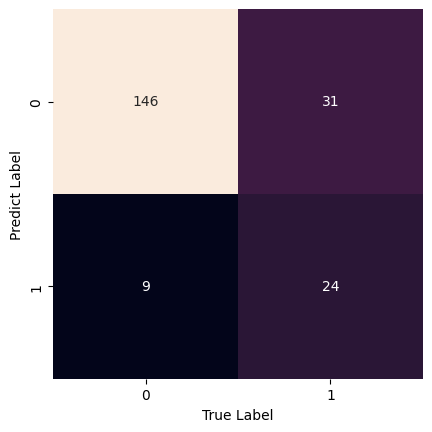

In [118]:
# Visualisasi confusion matrix SVM
mat=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(
    mat.T,
    square=True,
    annot=True,
    fmt='d',
    cbar=False
)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

Hasil Evaluasi Pemodelan SVM
1.  Model akurasi dalam mempredict orang yang Tidak Gagal Bayar akurasi sebesar 82%, sedangkan overall accuracy 81% jadi bisa disimpulkan bahwa model tepat dalam mempredict orang yg TIDAK GAGAL BAYAR.

2. Model overfit dalam mempredict Orang yang GAGAGL BAYAR. Hal ini ditunjukan nilai precisi 56% dan nilai accurasi overall 81%. Artinya precisi lebih rendah daripada accurasi (High accuracy and low precisi)

3. Berdasarkan confustion matrix, maka model pintar dalam mempredict orang yang tidak gagal bayar.

### XGboost Model

In [119]:
from xgboost import XGBClassifier

In [120]:
# Object XGboost
xgb=XGBClassifier()

# Train model
model_xgb=xgb.fit(x_train,y_train)

# Predict model
y_pred_xgb=model_xgb.predict(x_test)

# Evaluasi XGboost
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       155
         1.0       0.57      0.44      0.49        55

    accuracy                           0.77       210
   macro avg       0.69      0.66      0.67       210
weighted avg       0.75      0.77      0.76       210



Text(113.9222222222222, 0.5, 'Predict Label')

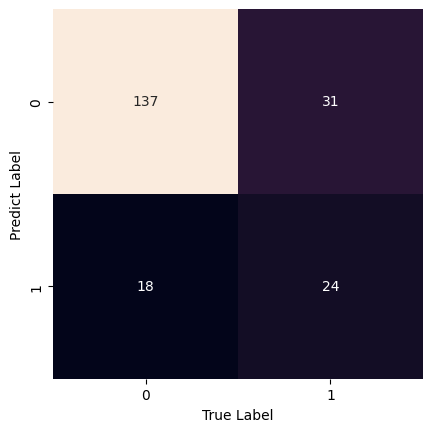

In [121]:
# Visualisasi confusion matrix SVM
mat=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(
    mat.T,
    square=True,
    annot=True,
    fmt='d',
    cbar=False
)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

Hasil evaluasi XGboost
1. Model UNDERFIT untuk mempredict orang yg TIDAK GAGAL BAYAR dengan tingkat akurasi 77% dan presisi TIDAK GAGAL BAYAR 82%
2. Model OVERFIT untuk mempredict orang yg GAGAL BAYAR dengan tingkat akurasi 77% dan presisi 57%

<Axes: >

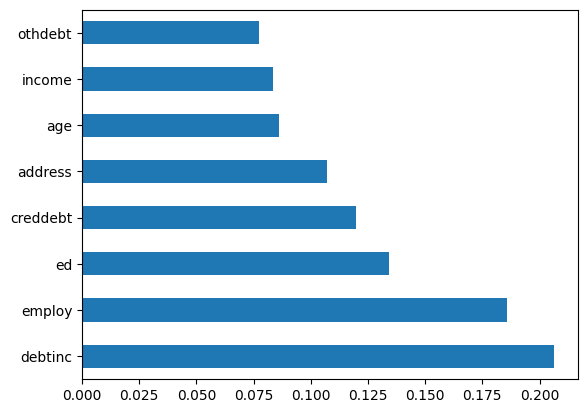

In [122]:
# Signifikan factor dari awal --> XGboost
feat_importances=pd.Series(
    model_xgb.feature_importances_,
    index=x.columns
)
feat_importances.nlargest(10).plot(kind='barh')

## Conclusion
Kita akan menggunakan model **SVM** untuk implementasi Machine Learning dalam memutuskan mana nasabah yg akan diterima permohonan kreditnya.


### Implement Model to Machine Learnig

Model yg akan digunakan adalah SVM

In [123]:
# Loading new customer dataset
path1='/content/drive/MyDrive/DataSource/credit_risk_newCust.csv'
load_data_newNasabah=pd.read_csv(path1)
load_data_newNasabah

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...,...
145,845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
146,846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
147,847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
148,848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [124]:
df1=pd.DataFrame(load_data_newNasabah)
df1

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...,...
145,845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
146,846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
147,847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
148,848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [125]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  150 non-null    int64  
 1   age         150 non-null    int64  
 2   ed          150 non-null    int64  
 3   employ      150 non-null    int64  
 4   address     150 non-null    int64  
 5   income      150 non-null    int64  
 6   debtinc     150 non-null    float64
 7   creddebt    150 non-null    float64
 8   othdebt     150 non-null    float64
 9   default     0 non-null      float64
dtypes: float64(4), int64(6)
memory usage: 11.8 KB


In [126]:
# Input variabel
x1=df1[[
    'age',
    'ed',
    'employ',
    'address',
    'income',
    'debtinc',
    'creddebt',
    'othdebt'
]]

## Applying Model SVM

In [127]:
y_predict_newNasabah = model_svm.predict(x1)
y_predict_newNasabah

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [128]:
# Mengubah hasil pemodelan yg berbentuk Array ke Dataframe
df_y_predict_newNasabah=pd.DataFrame({'Prediction_GagalBayar':y_predict_newNasabah}).round(2)
df_y_predict_newNasabah

,Prediction_GagalBayar
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
145,0.0
146,0.0
147,0.0
148,0.0


In [129]:
# Menggabungkan dataset NewNasabah dengan Hasil Predict nya
df_hasil_predict_svm=pd.concat([
    df1,
    df_y_predict_newNasabah],
    sort=False,
    axis=1
)
df_hasil_predict_svm.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,Prediction_GagalBayar
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN,0.0
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN,0.0
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN,1.0
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN,0.0
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN,0.0


In [130]:
df_hasil_predict_svm['Prediction_GagalBayar'].value_counts()

0.0    127
1.0     23
Name: Prediction_GagalBayar, dtype: int64

Menambahkan visualisasi berapa % yg gagal bayar dan tidak gagal bayar

# MENTORING DAY 4

## 2. Prediksi nilai kredit yang akan diberikan kepada nasabah lama (old nasabah)
**Problem** : estimasi

  *  **Kemungkinan algoritma**:
* Linier Regression
* MLP Regressor (ANN)

In [131]:
df_oldNasabah=df
df_oldNasabah.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,total_creddebt,total_nilai_kredit
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0,16.368,-100.035787
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0,5.363,27.144406
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0,3.025,28.267136
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0,3.480,21.931208
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0,4.844,25.805073


In [132]:
df_oldNasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 700 non-null    int64  
 1   ed                  700 non-null    int64  
 2   employ              700 non-null    int64  
 3   address             700 non-null    int64  
 4   income              700 non-null    int64  
 5   debtinc             700 non-null    float64
 6   creddebt            700 non-null    float64
 7   othdebt             700 non-null    float64
 8   default             700 non-null    float64
 9   total_creddebt      700 non-null    float64
 10  total_nilai_kredit  700 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 60.3 KB


Kenaikan nilai kredit diberikan kepada nasabah lama yang tidak pernah gagal bayar

In [133]:
df_oldNasabah1=df_oldNasabah[
    (df_oldNasabah['default']==0)
    &
    (df_oldNasabah['creddebt']<0.3)
]
df_oldNasabah1.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,total_creddebt,total_nilai_kredit
7,43,1,12,11,38,3.6,0.128592,1.239408,0.0,1.368,28.983464
10,27,1,0,1,16,1.7,0.182512,0.089488,0.0,0.272,28.966689
11,25,1,4,0,23,5.2,0.252356,0.943644,0.0,1.196,28.936316
19,41,3,0,21,26,1.7,0.099008,0.342992,0.0,0.442,28.990197
29,26,3,2,1,37,14.2,0.204906,5.049094,0.0,5.254,28.958014


In [134]:
df_oldNasabah1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 7 to 693
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 115 non-null    int64  
 1   ed                  115 non-null    int64  
 2   employ              115 non-null    int64  
 3   address             115 non-null    int64  
 4   income              115 non-null    int64  
 5   debtinc             115 non-null    float64
 6   creddebt            115 non-null    float64
 7   othdebt             115 non-null    float64
 8   default             115 non-null    float64
 9   total_creddebt      115 non-null    float64
 10  total_nilai_kredit  115 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 10.8 KB


### Data Modelling

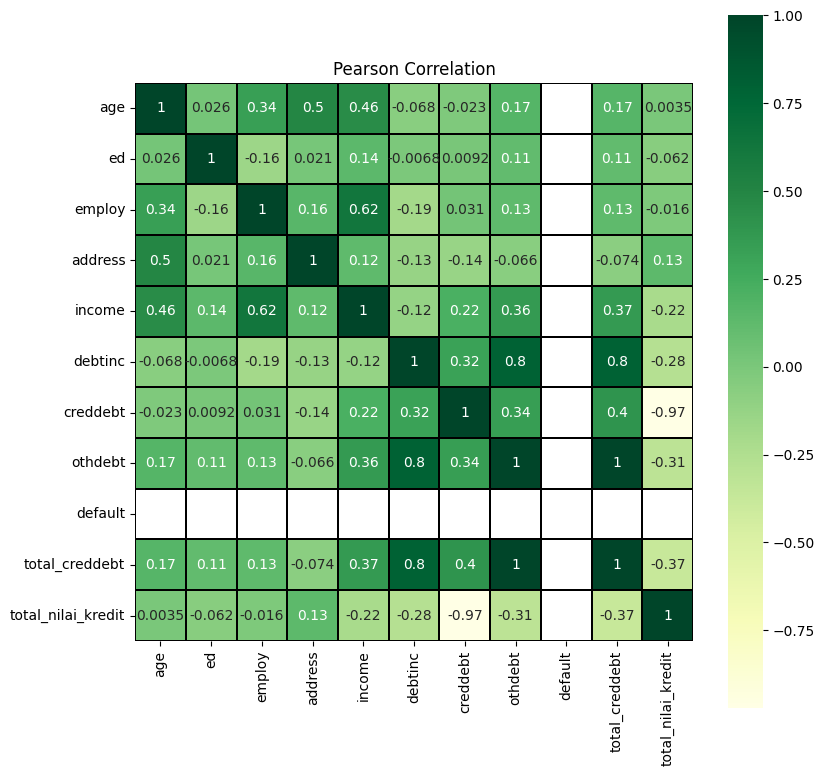

In [135]:
f,ax=plt.subplots(figsize=(9,9))
plt.title('Pearson Correlation')
sns.heatmap(
    df_oldNasabah1.astype(float).corr(),
    linewidth=0.25,
    vmax=1.0,
    square=True,
    cmap='YlGn',
    linecolor='black',
    annot=True
)
plt.show()

In [136]:
# Menentukan input variabel
x2=df_oldNasabah1[[
    'age',
    'ed',
    'employ',
    'address',
    'income',
    'debtinc',
    'creddebt',
    'othdebt',
    'default',
    'total_creddebt'
]]

# Menentukan target variabel
y2=df_oldNasabah1['total_nilai_kredit']

In [137]:
# untuk split data kita menjadi training dan testing
from sklearn.model_selection import train_test_split
# untuk Linear model
from sklearn.linear_model import LinearRegression
# untuk evaluasi model
from sklearn import metrics

In [138]:
# split data menjadi train 70% dan test 30%
x2_train, x2_test, y2_train, y2_test=train_test_split(
    x2,
    y2,
    test_size=0.3,
    random_state=0
)

#### Linear Regression

In [139]:
reg=LinearRegression()

# Train model
model_reg=reg.fit(x2_train,y2_train)

In [140]:
# Prediksi dengan data test
y_pred_reg = model_reg.predict(x2_test)

In [141]:
# Evaluation Linier Regression
print('r2_score: ', metrics.r2_score(y2_test,y_pred_reg))

r2_score:  0.9520978067702616


In [142]:
# Membuat Script MAPE
def mean_absolute_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

print('MAPE: ',mean_absolute_percentage_error(y2_test,y_pred_reg))

MAPE:  0.01764326419622753


- Hasil evaluasi pada model Linier Regression : BAIK
- R2 menunjukkan nilai 0.95 mendekati 1, artinya untuk menjadi excelent hanya kurang 0.05
- MAPE = 0.01 artinya tingkat error = 0.01% dan tingkat kesuksesan = 99.99%

#### MLP Regression (Artificial Neural Network)

In [143]:
from sklearn.neural_network import MLPRegressor

In [144]:
# Object MLP Regressor
mlp_reg=MLPRegressor(
    hidden_layer_sizes=(150,100,50),
    max_iter=1000
)
# Train model
model_mlp=mlp_reg.fit(x2_train,y2_train)

# Predict model
y_pred_mlp=model_mlp.predict(x2_test)

In [145]:
# Evaluation MLP Regression
print('r2_score: ', metrics.r2_score(y2_test,y_pred_mlp))

r2_score:  -5366.952111745181


In [146]:
print('MAPE: ',mean_absolute_percentage_error(y2_test,y_pred_mlp))

MAPE:  4.895265964122434


Hasil evaluasi pemodelan Neural Network (MLP Regressor)

1. R2 = -5458 dalam kategori sangat buruk
2. MAPE = 5.2% artinya ketepatan model = 94.8%

### Implement Model to Machine Learnig

Model yg akan digunakan adalah Linear Regression

In [147]:
# Loading new nasabah dataset
path2='/content/drive/MyDrive/DataSource/credit_risk_newCust.csv'
new_Nasabah=pd.read_csv(path2)
new_Nasabah

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...,...
145,845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
146,846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
147,847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
148,848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [148]:
df_new_Nasabah=pd.DataFrame(new_Nasabah)
df_new_Nasabah

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...,...
145,845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
146,846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
147,847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
148,848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [149]:
df_new_Nasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  150 non-null    int64  
 1   age         150 non-null    int64  
 2   ed          150 non-null    int64  
 3   employ      150 non-null    int64  
 4   address     150 non-null    int64  
 5   income      150 non-null    int64  
 6   debtinc     150 non-null    float64
 7   creddebt    150 non-null    float64
 8   othdebt     150 non-null    float64
 9   default     0 non-null      float64
dtypes: float64(4), int64(6)
memory usage: 11.8 KB
